In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras import layers

In [2]:
pokemon_df = pd.read_csv('./pokemon.csv')
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
pokemon_df = pokemon_df.set_index("#") # 設#為索引值

In [4]:
combats_df = pd.read_csv('./combats.csv')
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


In [6]:
pokemon_df["Type 2"].value_counts(dropna=False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Water        14
Ghost        14
Rock         14
Ice          14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

### 填補資料缺失（NaN）

In [7]:
pokemon_df["Type 2"].fillna('empty',inplace=True) #inplace 將資料更新後放回原本位置
pokemon_df["Type 2"].value_counts()

empty       386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Water        14
Ghost        14
Rock         14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [8]:
combats_df.dtypes 

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object

In [9]:
pokemon_df.dtypes #須轉換資料型態 type 1 type2 legendary

Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [10]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].astype('category') #底下有很多函數可以用
pokemon_df['Type 2'] = pokemon_df['Type 2'].astype('category')
pokemon_df['Legendary'] = pokemon_df['Legendary'].astype('int')
pokemon_df.dtypes

Name            object
Type 1        category
Type 2        category
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary        int64
dtype: object

In [11]:
df_type1_one_hot = pd.get_dummies(pokemon_df['Type 1'])
df_type1_one_hot.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df_type2_one_hot = pd.get_dummies(pokemon_df['Type 2'])
df_type2_one_hot.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [13]:
combine_df_one = df_type1_one_hot.add(df_type2_one_hot,fill_value=0).astype('int64')

In [14]:
pd.options.display.max_columns = 30
pokemon_df = pokemon_df.join(combine_df_one)
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,Fire,empty,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [15]:
dict(enumerate(pokemon_df['Type 2'].cat.categories))

{0: 'Bug',
 1: 'Dark',
 2: 'Dragon',
 3: 'Electric',
 4: 'Fairy',
 5: 'Fighting',
 6: 'Fire',
 7: 'Flying',
 8: 'Ghost',
 9: 'Grass',
 10: 'Ground',
 11: 'Ice',
 12: 'Normal',
 13: 'Poison',
 14: 'Psychic',
 15: 'Rock',
 16: 'Steel',
 17: 'Water',
 18: 'empty'}

In [16]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].cat.codes
pokemon_df['Type 2'] = pokemon_df['Type 2'].cat.codes
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
pokemon_df.drop('Name', axis='columns', inplace=True)

In [18]:
combats_df['Winner'] = combats_df.apply(lambda x: 0
                                        if x.Winner == x.First_pokemon else 1,
                                        axis = 'columns')
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


### 資料集分割

In [19]:
data_num = combats_df.shape[0]

In [20]:
indexs = np.random.permutation(data_num)

In [21]:
train_indexs = indexs[:int(data_num*0.6)]
val_indexs = indexs[int(data_num*0.6):int(data_num*0.8)]
test_indexs = indexs[int(data_num*0.8):]

train_data = combats_df.loc[train_indexs]
val_data = combats_df.loc[val_indexs]
test_data = combats_df.loc[test_indexs]

### 標準化

In [22]:
pokemon_df['Type 1'] = pokemon_df['Type 1']/19
pokemon_df['Type 2'] = pokemon_df['Type 2']/19

In [23]:
mean = pokemon_df.loc[:,'HP':'Generation'].mean()
std = pokemon_df.loc[:,'HP':'Generation'].std()
pokemon_df.loc[:,'HP':'Generation'] = (pokemon_df.loc[:,'HP':'Generation']-mean/std)

In [24]:
pokemon_df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.473684,0.684211,42.287658,46.565999,46.632001,62.774606,62.416267,42.650503,-1.000704,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0.473684,0.684211,57.287658,59.565999,60.632001,77.774606,77.416267,57.650503,-1.000704,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.473684,0.684211,77.287658,79.565999,80.632001,97.774606,97.416267,77.650503,-1.000704,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.473684,0.684211,77.287658,97.565999,120.632001,119.774606,117.416267,77.650503,-1.000704,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,0.315789,0.947368,36.287658,49.565999,40.632001,57.774606,47.416267,62.650503,-1.000704,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
train_data

,First_pokemon,Second_pokemon,Winner
30480,216,604,0
16767,755,209,1
6612,360,761,0
48803,567,625,1
48360,404,733,0
...,...,...,...
8585,378,629,1
5925,259,221,1
35546,420,71,1
41500,171,621,0


### 建立numpy array的訓練格式

In [26]:
x_train_index = np.array(train_data.drop('Winner',axis='columns'))
x_val_index = np.array(val_data.drop('Winner',axis='columns'))
x_test_index = np.array(test_data.drop('Winner',axis='columns'))
print(x_train_index)

[[216 604]
 [755 209]
 [360 761]
 ...
 [420  71]
 [171 621]
 [275  10]]


In [27]:
y_train = np.array(train_data['Winner'])
y_val = np.array(val_data['Winner'])
y_test = np.array(test_data['Winner'])

### 準備兩種不同的輸入資料

In [28]:
#1
## pokemon的屬性為數值表示
pokemon_data_normal = np.array(pokemon_df.loc[:,:'Legendary'])
print(pokemon_data_normal.shape)

(800, 10)


In [29]:
## 透過前面準備索引值產生輸入資料
x_train_normal = pokemon_data_normal[x_train_index-1].reshape((-1,20))
x_val_normal = pokemon_data_normal[x_val_index-1].reshape((-1,20))
x_test_normal = pokemon_data_normal[x_test_index-1].reshape((-1,20))

In [30]:
#2
## pokemon的屬性為one-hot-encoding表示
pokemon_data_one_hot = np.array(pokemon_df.loc[:,'HP':])

In [31]:
x_train_one_hot = pokemon_data_one_hot[x_train_index-1].reshape(-1,54)
x_val_one_hot = pokemon_data_one_hot[x_val_index-1].reshape(-1,54)
x_test_one_hot = pokemon_data_one_hot[x_test_index-1].reshape((-1,54))

In [32]:
x_train_one_hot.shape

(30000, 54)

In [33]:
x_train_normal.shape

(30000, 20)

### 建造神經網路
* 使用數值編碼訓練網路

In [34]:
inputs = keras.Input(shape=(20, )) 
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(1)(x)

model_1 = keras.Model(inputs, outputs, name='model-1')
model_1.summary()  

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0   

In [35]:
model_dir = 'lab3-logs/models'
os.makedirs(model_dir)

In [36]:
log_dir = os.path.join('lab3-logs', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5', 
                                             monitor='val_binary_accuracy', 
                                             save_best_only=True, 
                                             mode='max')

In [37]:
model_1.compile(keras.optimizers.Adam(), 
               loss=keras.losses.BinaryCrossentropy(from_logits=True), 
               metrics=[keras.metrics.BinaryAccuracy()])

In [38]:
history_1 = model_1.fit(x_train_normal, y_train, 
                batch_size=64 ,
                epochs=200, 
                validation_data=(x_val_normal, y_val),
                callbacks=[model_cbk, model_mckp])

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 2.2206 - binary_accuracy: 0.5902 - val_loss: 0.4222 - val_binary_accuracy: 0.8262
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 0.4749 - binary_accuracy: 0.7774 - val_loss: 0.3518 - val_binary_accuracy: 0.8740
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.4004 - binary_accuracy: 0.8380 - val_loss: 0.3294 - val_binary_accuracy: 0.9049
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3835 - binary_accuracy: 0.8538 - val_loss: 0.2909 - val_binary_accuracy: 0.9156
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3489 - binary_accuracy: 0.8756 - val_loss: 0.2779 - val_binary_accuracy: 0.9186
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3169 - binary_accuracy: 0.8880 - val_loss: 0.2422 - val_binary_accuracy: 0.9301
Epoch 7/200
469/469 [==============================] - 1s 

Epoch 53/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2056 - binary_accuracy: 0.9305 - val_loss: 0.1842 - val_binary_accuracy: 0.9378
Epoch 54/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1967 - binary_accuracy: 0.9324 - val_loss: 0.1800 - val_binary_accuracy: 0.9392
Epoch 55/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1917 - binary_accuracy: 0.9356 - val_loss: 0.1720 - val_binary_accuracy: 0.9477
Epoch 56/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1911 - binary_accuracy: 0.9367 - val_loss: 0.1783 - val_binary_accuracy: 0.9442
Epoch 57/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1913 - binary_accuracy: 0.9365 - val_loss: 0.1800 - val_binary_accuracy: 0.9461
Epoch 58/200
469/469 [==============================] - 1s 3ms/step - loss: 0.1964 - binary_accuracy: 0.9310 - val_loss: 0.1834 - val_binary_accuracy: 0.9464
Epoch 59/200
469/469 [==============================

Epoch 105/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1987 - binary_accuracy: 0.9340 - val_loss: 0.1794 - val_binary_accuracy: 0.9424
Epoch 106/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1970 - binary_accuracy: 0.9359 - val_loss: 0.1776 - val_binary_accuracy: 0.9414
Epoch 107/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1916 - binary_accuracy: 0.9350 - val_loss: 0.1864 - val_binary_accuracy: 0.9453
Epoch 108/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1883 - binary_accuracy: 0.9345 - val_loss: 0.1772 - val_binary_accuracy: 0.9457
Epoch 109/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1935 - binary_accuracy: 0.9355 - val_loss: 0.1783 - val_binary_accuracy: 0.9474
Epoch 110/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1977 - binary_accuracy: 0.9309 - val_loss: 0.1791 - val_binary_accuracy: 0.9425
Epoch 111/200
469/469 [=======================

469/469 [==============================] - 1s 2ms/step - loss: 0.1902 - binary_accuracy: 0.9370 - val_loss: 0.1773 - val_binary_accuracy: 0.9453
Epoch 157/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1866 - binary_accuracy: 0.9375 - val_loss: 0.1746 - val_binary_accuracy: 0.9484
Epoch 158/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1852 - binary_accuracy: 0.9362 - val_loss: 0.1841 - val_binary_accuracy: 0.9343
Epoch 159/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1956 - binary_accuracy: 0.9327 - val_loss: 0.1754 - val_binary_accuracy: 0.9496
Epoch 160/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1890 - binary_accuracy: 0.9359 - val_loss: 0.1723 - val_binary_accuracy: 0.9492
Epoch 161/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1926 - binary_accuracy: 0.9361 - val_loss: 0.1749 - val_binary_accuracy: 0.9473
Epoch 162/200
469/469 [==============================] - 1s 

* 使用one-hot-encoding訓練網路

In [39]:
inputs = keras.Input(shape=(54,))
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_2 = keras.Model(inputs,outputs,name='model-2')
model_2.summary()

Model: "model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 54)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                3520      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0   

In [40]:
model_2.compile(keras.optimizers.Adam(),
               loss = keras.losses.BinaryCrossentropy(),
               metrics=[keras.metrics.BinaryAccuracy()])

In [41]:
log_dir = os.path.join('lab3-logs','model-2')
model_cbk=keras.callbacks.TensorBoard(log_dir = log_dir)
model_mckp=keras.callbacks.ModelCheckpoint(model_dir+'/Best_model-2.h5',
                                          monitor='val_binary_accuracy',
                                          save_best_only=True,
                                          mode='max')

In [42]:
history_2 = model_2.fit(x_train_one_hot,y_train,
                       batch_size=64,
                       epochs=200,
                       validation_data=(x_val_one_hot,y_val),
                       callbacks=[model_cbk,model_mckp])

Epoch 1/200
469/469 [==============================] - 2s 3ms/step - loss: 1.8321 - binary_accuracy: 0.5575 - val_loss: 0.4605 - val_binary_accuracy: 0.8510
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.5136 - binary_accuracy: 0.7566 - val_loss: 0.3678 - val_binary_accuracy: 0.8990
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.4378 - binary_accuracy: 0.8451 - val_loss: 0.3453 - val_binary_accuracy: 0.9109
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3878 - binary_accuracy: 0.8737 - val_loss: 0.2984 - val_binary_accuracy: 0.9205
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3662 - binary_accuracy: 0.8833 - val_loss: 0.2594 - val_binary_accuracy: 0.9259
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.3303 - binary_accuracy: 0.8953 - val_loss: 0.2399 - val_binary_accuracy: 0.9249
Epoch 7/200
469/469 [==============================] - 1s 

Epoch 53/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1895 - binary_accuracy: 0.9394 - val_loss: 0.1758 - val_binary_accuracy: 0.9455
Epoch 54/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1973 - binary_accuracy: 0.9362 - val_loss: 0.1691 - val_binary_accuracy: 0.9483
Epoch 55/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1941 - binary_accuracy: 0.9377 - val_loss: 0.1797 - val_binary_accuracy: 0.9415
Epoch 56/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2050 - binary_accuracy: 0.9337 - val_loss: 0.1821 - val_binary_accuracy: 0.9403
Epoch 57/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1912 - binary_accuracy: 0.9376 - val_loss: 0.1681 - val_binary_accuracy: 0.9455
Epoch 58/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2033 - binary_accuracy: 0.9328 - val_loss: 0.1902 - val_binary_accuracy: 0.9368
Epoch 59/200
469/469 [==============================

Epoch 105/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1844 - binary_accuracy: 0.9425 - val_loss: 0.1643 - val_binary_accuracy: 0.9446
Epoch 106/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1878 - binary_accuracy: 0.9402 - val_loss: 0.1645 - val_binary_accuracy: 0.9502
Epoch 107/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1809 - binary_accuracy: 0.9444 - val_loss: 0.1650 - val_binary_accuracy: 0.9458
Epoch 108/200
469/469 [==============================] - 1s 3ms/step - loss: 0.1731 - binary_accuracy: 0.9443 - val_loss: 0.1642 - val_binary_accuracy: 0.9472
Epoch 109/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1822 - binary_accuracy: 0.9432 - val_loss: 0.1610 - val_binary_accuracy: 0.9468
Epoch 110/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1766 - binary_accuracy: 0.9442 - val_loss: 0.1606 - val_binary_accuracy: 0.9478
Epoch 111/200
469/469 [=======================

469/469 [==============================] - 1s 2ms/step - loss: 0.1933 - binary_accuracy: 0.9387 - val_loss: 0.1580 - val_binary_accuracy: 0.9474
Epoch 157/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1827 - binary_accuracy: 0.9424 - val_loss: 0.1572 - val_binary_accuracy: 0.9501
Epoch 158/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1774 - binary_accuracy: 0.9438 - val_loss: 0.1562 - val_binary_accuracy: 0.9494
Epoch 159/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1720 - binary_accuracy: 0.9461 - val_loss: 0.1617 - val_binary_accuracy: 0.9461
Epoch 160/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1828 - binary_accuracy: 0.9413 - val_loss: 0.1612 - val_binary_accuracy: 0.9487
Epoch 161/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1698 - binary_accuracy: 0.9473 - val_loss: 0.1847 - val_binary_accuracy: 0.9270
Epoch 162/200
469/469 [==============================] - 1s 

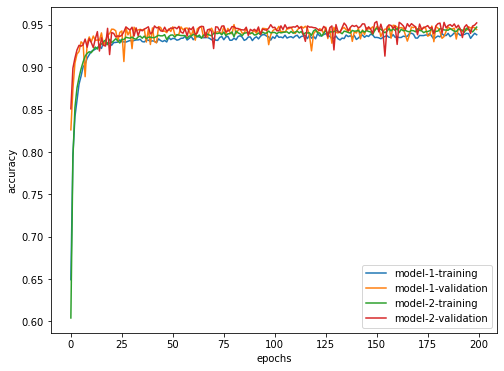

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(history_1.history['binary_accuracy'], label='model-1-training')
plt.plot(history_1.history['val_binary_accuracy'], label='model-1-validation')
plt.plot(history_2.history['binary_accuracy'], label='model-2-training')
plt.plot(history_2.history['val_binary_accuracy'], label='model-2-validation')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()

In [44]:
model_1.load_weights(model_dir + '/Best-model-1.h5')
model_2.load_weights(model_dir + '/Best_model-2.h5')
loss_1,accuracy_1 = model_1.evaluate(x_test_normal,y_test)
loss_2,accuracy_2 = model_2.evaluate(x_test_one_hot,y_test)
print("model_1:{}% model_2:{}%".format(accuracy_1,accuracy_2))

313/313 [==============================] - 0s 785us/step - loss: 0.1543 - binary_accuracy: 0.9521
model_1:0.9505000114440918% model_2:0.9520999789237976%
